SVM Confusion Matrix:
 [[105  46]
 [ 18  62]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       151
           1       0.57      0.78      0.66        80

    accuracy                           0.72       231
   macro avg       0.71      0.74      0.71       231
weighted avg       0.76      0.72      0.73       231

SVM Accuracy Score: 0.7229437229437229
SVM Best parameters: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best cross-validation accuracy score: 0.77


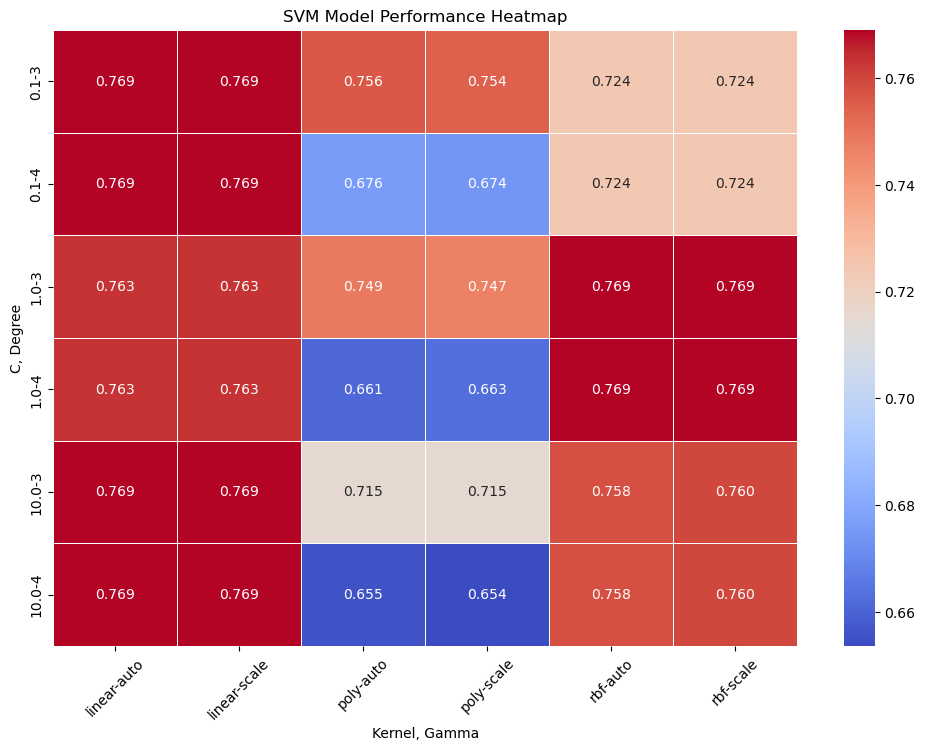

C:\Users\Alisher Amer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best cross-validation accuracy score: 0.84
Confusion Matrix:
 [[109  42]
 [ 29  51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.55      0.64      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.70       231

Accuracy Score: 0.6926406926406926


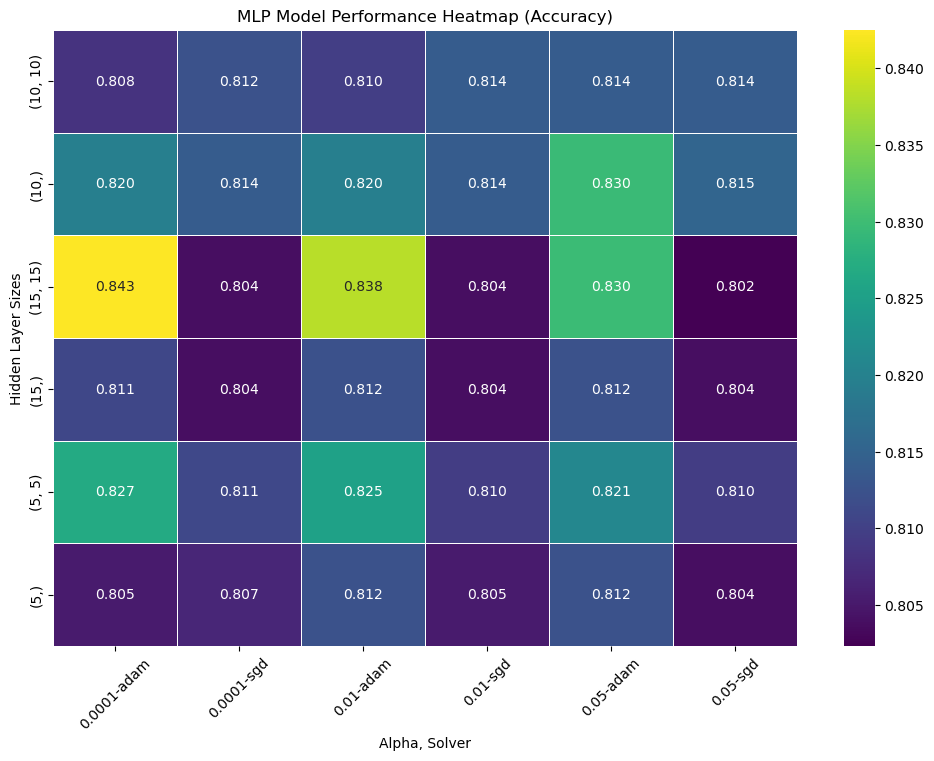

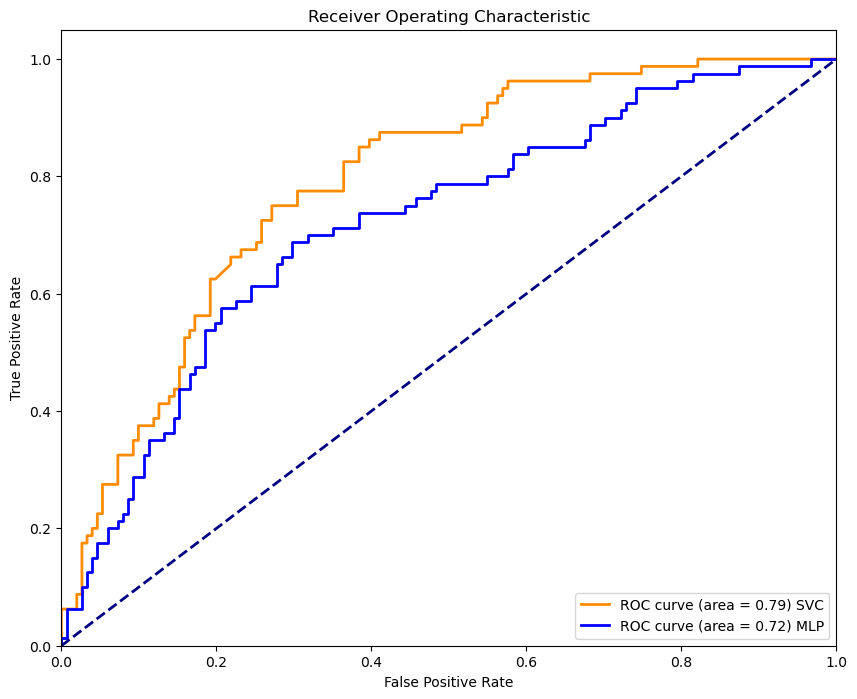

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  # Import SMOTE algorithm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv(r"C:\Users\Alisher Amer\OneDrive\Desktop\salam\diabetes.csv")

# Replace zeros  to NaN for imputation
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Impute missing values with the median before splitting
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[columns_to_replace] = imputer.fit_transform(df[columns_to_replace])

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVC (Support Vector Classifier)
svc = SVC(random_state=1, class_weight='balanced', probability=True)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'linear'
    'degree': [3, 4],  # Degree of the polynomial kernel function ('poly'). Ignored for others
}

# Create GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)

# Using the best estimator from the grid search to make predictions
y_pred_svc = grid_search_svc.predict(X_test_scaled)
y_proba_svc = grid_search_svc.predict_proba(X_test_scaled)[:, 1]


# Evaluation metrics
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svc))

# Extracting and printing the best parameters and best score from the grid search
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print(f"SVM Best parameters: {best_params_svc}")
print(f"SVM Best cross-validation accuracy score: {best_score_svc:.2f}")

# Convert to DataFrame for the heatmap
results_df_svc = pd.DataFrame(grid_search_svc.cv_results_)
pivot_table_svc = results_df_svc.pivot_table(values='mean_test_score', 
                                             index=['param_C', 'param_degree'], 
                                             columns=['param_kernel', 'param_gamma'], 
                                             aggfunc=np.max)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_svc, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('SVM Model Performance Heatmap')
plt.xlabel('Kernel, Gamma')
plt.ylabel('C, Degree')
plt.xticks(rotation=45)
plt.show()

# Apply SMOTE to create synthetic samples
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize the MLP Classifier
mlp = MLPClassifier(max_iter=300, random_state=1)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (5,5), (10,10), (15,15)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.01, 0.05],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.01]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Extracting and outputing the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy score: {best_score:.2f}")

# Making predictions with the best estimator from the grid search
y_pred = grid_search.predict(X_test_scaled)
y_proba_mlp = grid_search.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Convert to DataFrame for the heatmap
results_df = pd.DataFrame(grid_search.cv_results_)
results_df['param_hidden_layer_sizes'] = results_df['param_hidden_layer_sizes'].astype(str)

# Create a pivot table for the heatmap that shows mean test accuracy
pivot_table = results_df.pivot_table(values='mean_test_score', 
                                     index='param_hidden_layer_sizes', 
                                     columns=['param_alpha', 'param_solver'], 
                                     aggfunc=np.max)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('MLP Model Performance Heatmap (Accuracy)')
plt.xlabel('Alpha, Solver')
plt.ylabel('Hidden Layer Sizes')
plt.xticks(rotation=45)
plt.show()

# Plot ROC Curve for both models
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=lw, label='ROC curve (area = %0.2f) SVC' % roc_auc_svc)
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=lw, label='ROC curve (area = %0.2f) MLP' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()